In [2]:
import torch
from torchvision import models, transforms
from PIL import Image
import matplotlib.pyplot as plt
from torchvision.models import resnet50
from torchvision.transforms.functional import to_tensor



In [3]:
import os
import sys
# Set up paths
module_path = os.path.abspath(os.path.join("../../"))
if module_path not in sys.path:
    sys.path.append(module_path)

from easy_explain import CAMExplain  # Adjust the import according to your package structure

/Users/stavrostheocharis/Desktop/Projects/easy_explain/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
model = resnet50(pretrained=True).eval()


/Users/stavrostheocharis/Desktop/Projects/easy_explain/.venv/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/stavrostheocharis/Desktop/Projects/easy_explain/.venv/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [6]:
cam_explainer = CAMExplain(model, target_layers=["layer4"], cam_type="LayerCAM", alpha=0.5)

In [7]:
img_path = 'nam-anh-QJbyG6O0ick-unsplash.jpg'
img = Image.open(img_path).convert('RGB')
input_tensor = to_tensor(img).unsqueeze(0)  # Add batch dimension

cam_explainer.generate_explanation(img, input_tensor)

KeyboardInterrupt: 

In [4]:
# Load the model

# Load and preprocess the image
img_path = 'nam-anh-QJbyG6O0ick-unsplash.jpg'
img = Image.open(img_path).convert('RGB')
input_tensor = to_tensor(img).unsqueeze(0)  # Add batch dimension

# Initialize and use CAMExplain
cam_explainer = CAMExplain(model, target_layers=["layer2", "layer3", "layer4"], cam_type="LayerCAM", alpha=0.5)
cam_explainer.generate_explanation(img, input_tensor)

/Users/stavrostheocharis/Desktop/Projects/easy_explain/.venv/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/stavrostheocharis/Desktop/Projects/easy_explain/.venv/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [3]:
# Define the transformation
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Load and transform the image
img_path = 'nam-anh-QJbyG6O0ick-unsplash.jpg'  # Update this path
image = Image.open(img_path)
input_tensor = transform(image).unsqueeze(0)  # Add batch dimension

/Users/stavrostheocharis/Desktop/Projects/easy_explain/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
cam_explainer = CAMExplain(model, target_layers=["layer4"], cam_type="LayerCAM", alpha=0.5)

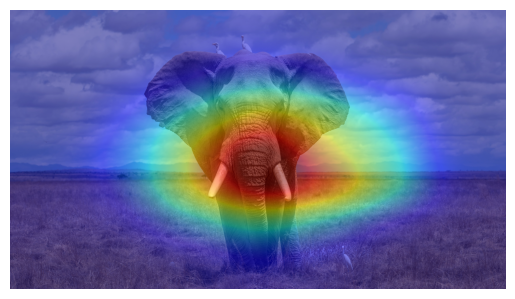

/Users/stavrostheocharis/Desktop/Projects/easy_explain/.venv/lib/python3.11/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


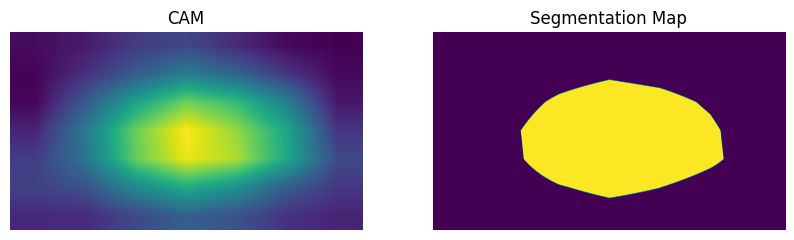

In [6]:
cam_explainer.generate_explanation(image, input_tensor, localisation_mask=True)

In [ ]:
extract_cam(img, input_tensor, resnet50_model, multiple_layers=["layer2", "layer3", "layer4"])


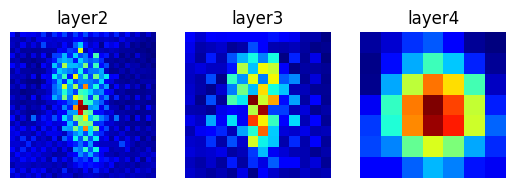

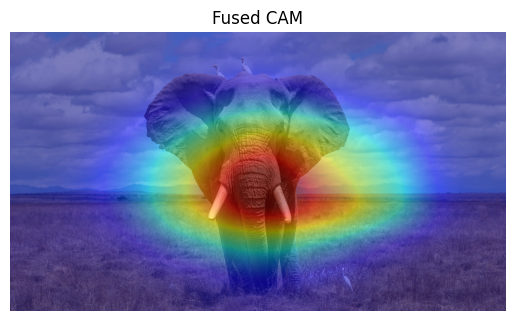

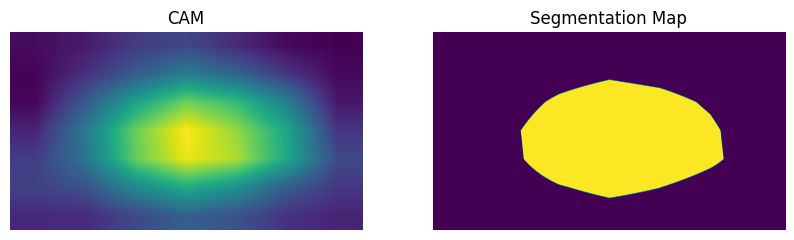

In [7]:
cam_explainer.generate_explanation(image, input_tensor, localisation_mask=True, multiple_layers=["layer2", "layer3", "layer4"])

In [ ]:
# Keep the features layers until the last CNN layer
features = []
features = [vgg19_model.features[x] for x in range(35)]

# Give as input all the gathered features layers
extract_cam(img, input_tensor, vgg19_model, target_layer=features)

In [ ]:
from torchvision.models import vgg19
from torchvision.transforms.functional import to_tensor
from PIL import Image
import os
import sys
# Set up paths
module_path = os.path.abspath(os.path.join("../../"))
if module_path not in sys.path:
    sys.path.append(module_path)

from easy_explain import CAMExplain  

# Load the model
model = vgg19(pretrained=True).eval()

# Prepare the image
img_path = 'nam-anh-QJbyG6O0ick-unsplash.jpg'
img = Image.open(img_path).convert('RGB')
input_tensor = to_tensor(img).unsqueeze(0)

# Specify multiple layers
layers = ["features.29", "features.30"]  # Example layers from VGG19

# Initialize and use CAMExplain
cam_explainer = CAMExplain(model, target_layers=layers, cam_type="SmoothGradCAMpp", alpha=0.5)
cam_explainer.generate_explanation(img, input_tensor, multiple_layers=layers)
